SCENARIO A: DIPD PRODUCTS-NET INCOME(STATIONARY)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Load Data
df = pd.read_csv("outputs/processed_dataset.csv", parse_dates=["period_end"])
df_dipd = df[df["company_name"] == "DIPPED PRODUCTS PLC"].copy()

# Focus on Net Income
series_dipd_ni = df_dipd[["period_end", "net_income"]].sort_values("period_end")
series_dipd_ni.set_index("period_end", inplace=True)

# 2. Train/Test Split
train_size = int(len(series_dipd_ni) * 0.8)
train, test = series_dipd_ni.iloc[:train_size], series_dipd_ni.iloc[train_size:]

# 3. Model Selection with auto_arima (optional)
#    We'll let auto_arima pick p,d,q and seasonal P,D,Q. We set m=4 for quarterly data.
stepwise_fit = auto_arima(train["net_income"], 
                          start_p=1, start_q=1,
                          max_p=5, max_q=5,
                          seasonal=True, m=4,
                          trace=True,  # shows output
                          error_action='ignore',  
                          suppress_warnings=True)

print(stepwise_fit.summary())

# 4. Build Final SARIMAX Model using the identified order
order = stepwise_fit.order         # (p, d, q)
seasonal_order = stepwise_fit.seasonal_order  # (P, D, Q, m)

model = SARIMAX(train["net_income"], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)
print(model_fit.summary())

# 5. Forecast on Test Set
n_test = len(test)
forecast = model_fit.forecast(steps=n_test)

# 6. Evaluate
mae = mean_absolute_error(test["net_income"], forecast)
mse = mean_squared_error(test["net_income"], forecast)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# 7. Plot Results
plt.figure(figsize=(10,5))
plt.plot(train.index, train["net_income"], label='Train')
plt.plot(test.index, test["net_income"], label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title("DIPD Net Income Forecast")
plt.legend()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np



In [4]:
# 1. Load Data
df = pd.read_csv("../outputs/processed_dataset.csv", parse_dates=["period_end"])

df_dipd = df[df["company_name"] == "DIPPED PRODUCTS PLC"].copy()

# Focus on Net Income
series_dipd_ni = df_dipd[["period_end", "net_income"]].sort_values("period_end")
series_dipd_ni.set_index("period_end", inplace=True)

# 2. Train/Test Split
train_size = int(len(series_dipd_ni) * 0.8)
train, test = series_dipd_ni.iloc[:train_size], series_dipd_ni.iloc[train_size:]






In [5]:
# 3. Model Selection with auto_arima (optional)
#    We'll let auto_arima pick p,d,q and seasonal P,D,Q. We set m=4 for quarterly data.
stepwise_fit = auto_arima(train["net_income"], 
                          start_p=1, start_q=1,
                          max_p=5, max_q=5,
                          seasonal=True, m=4,
                          trace=True,  # shows output
                          error_action='ignore',  
                          suppress_warnings=True)

print(stepwise_fit.summary())

c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
# 4. Build Final SARIMAX Model using the identified order
order = stepwise_fit.order         # (p, d, q)
seasonal_order = stepwise_fit.seasonal_order  # (P, D, Q, m)

model = SARIMAX(train["net_income"], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)
print(model_fit.summary())



In [ ]:
# 5. Forecast on Test Set
n_test = len(test)
forecast = model_fit.forecast(steps=n_test)

# 6. Evaluate
mae = mean_absolute_error(test["net_income"], forecast)
mse = mean_squared_error(test["net_income"], forecast)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# 7. Plot Results
plt.figure(figsize=(10,5))
plt.plot(train.index, train["net_income"], label='Train')
plt.plot(test.index, test["net_income"], label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title("DIPD Net Income Forecast")
plt.legend()
plt.show()

SCENARIO B: 


--- DIPPED PRODUCTS PLC - net_income ---
Train period: 2021-03-31 00:00:00 to 2024-06-30 00:00:00
Test period: 2024-09-30 00:00:00 to 2024-12-31 00:00:00
auto_arima failed with error: All lag values up to 'maxlag' produced singular matrices. Consider using a longer series, a different lag term or a different test.
Retrying with forced seasonal differencing D=0
Performing stepwise search to minimize aic


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklea

 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=459.830, Time=1.14 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=453.867, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=455.997, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=455.485, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=470.641, Time=0.01 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklea

 ARIMA(0,0,0)(1,0,0)[4] intercept   : AIC=455.267, Time=0.10 sec
 ARIMA(0,0,0)(0,0,1)[4] intercept   : AIC=454.093, Time=0.08 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[4] intercept   : AIC=456.029, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=454.370, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : AIC=454.151, Time=0.08 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[4] intercept   : AIC=456.438, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[4] intercept
Total fit time: 2.025 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:                        SARIMAX   Log Likelihood                -224.933
Date:                Sun, 23 Mar 2025   AIC                            453.867
Time:                        08:40:56   BIC                            455.145
Sample:                    03-31-2021   HQIC                           453.748
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.862e+06   7.02e+05      5.498      0.000    2.49e+06  

c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


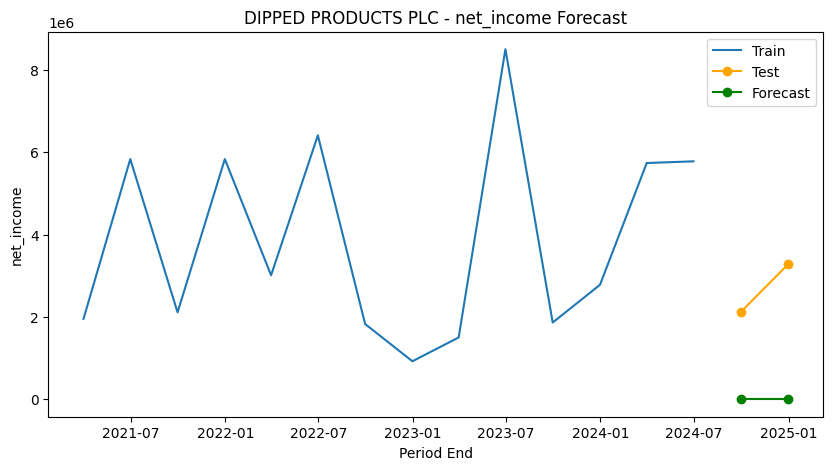


--- DIPPED PRODUCTS PLC - revenue ---
Train period: 2021-03-31 00:00:00 to 2024-06-30 00:00:00
Test period: 2024-09-30 00:00:00 to 2024-12-31 00:00:00
auto_arima failed with error: All lag values up to 'maxlag' produced singular matrices. Consider using a longer series, a different lag term or a different test.
Retrying with forced seasonal differencing D=0
Performing stepwise search to minimize aic


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklea

 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=528.248, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=521.885, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=525.347, Time=0.09 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=524.044, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=533.607, Time=0.04 sec
 ARIMA(0,0,0)(1,0,0)[4] intercept   : AIC=523.302, Time=0.09 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,1)[4] intercept   : AIC=521.465, Time=0.12 sec
 ARIMA(0,0,0)(1,0,1)[4] intercept   : AIC=523.430, Time=0.20 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,2)[4] intercept   : AIC=523.449, Time=0.14 sec
 ARIMA(0,0,0)(1,0,2)[4] intercept   : AIC=525.429, Time=0.16 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[4] intercept   : AIC=523.506, Time=0.10 sec
 ARIMA(1,0,1)(0,0,1)[4] intercept   : AIC=525.960, Time=0.17 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,1)[4]             : AIC=532.996, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,1)[4] intercept
Total fit time: 1.891 seconds
                                 SARIMAX Results                                 
Dep. Variable:                         y   No. Observations:                   14
Model:             SARIMAX(0, 0, [1], 4)   Log Likelihood                -257.732
Date:                   Sun, 23 Mar 2025   AIC                            521.465
Time:                           08:40:59   BIC                            523.382
Sample:                       03-31-2021   HQIC                           521.287
                            - 06-30-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.366e+07   1.35e+07      2.488 

c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


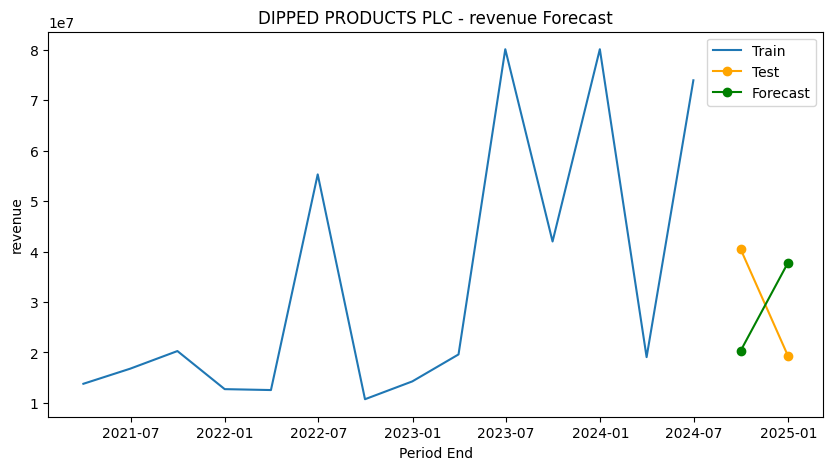


--- Richard Pieris Exports PLC - net_income ---
Train period: 2021-03-31 00:00:00 to 2024-06-30 00:00:00
Test period: 2024-09-30 00:00:00 to 2024-12-31 00:00:00
Performing stepwise search to minimize aic


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklea

 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=401.801, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=400.471, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=399.477, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=404.208, Time=0.01 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklea

 ARIMA(0,0,1)(0,0,0)[4] intercept   : AIC=397.833, Time=0.03 sec
 ARIMA(0,0,1)(1,0,0)[4] intercept   : AIC=399.716, Time=0.11 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[4] intercept   : AIC=400.758, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : AIC=399.696, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[4] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=399.036, Time=0.01 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[4] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,1)(0,0,0)[4]             : AIC=398.293, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[4] intercept
Total fit time: 2.401 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -195.916
Date:                Sun, 23 Mar 2025   AIC                            397.833
Time:                        08:41:01   BIC                            399.750
Sample:                    03-31-2021   HQIC                           397.655
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
interce

c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


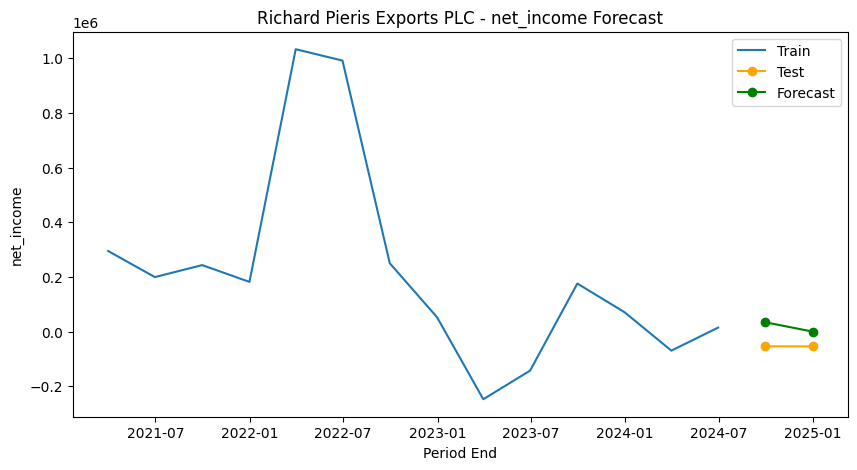


--- Richard Pieris Exports PLC - revenue ---
Train period: 2021-03-31 00:00:00 to 2024-06-30 00:00:00
Test period: 2024-09-30 00:00:00 to 2024-12-31 00:00:00
Performing stepwise search to minimize aic


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklea

 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=406.237, Time=0.01 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=408.222, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=405.935, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=446.312, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : AIC=404.136, Time=0.04 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,0)[4] intercept   : AIC=405.745, Time=0.23 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[4] intercept   : AIC=407.659, Time=0.95 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : AIC=405.611, Time=0.10 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[4] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=406.356, Time=0.03 sec


c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[4] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[4]             : AIC=440.982, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[4] intercept
Total fit time: 3.586 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -199.068
Date:                Sun, 23 Mar 2025   AIC                            404.136
Time:                        08:41:05   BIC                            406.054
Sample:                    03-31-2021   HQIC                           403.959
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
interce

c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\poshitha.jayawickrem\Desktop\20_03_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


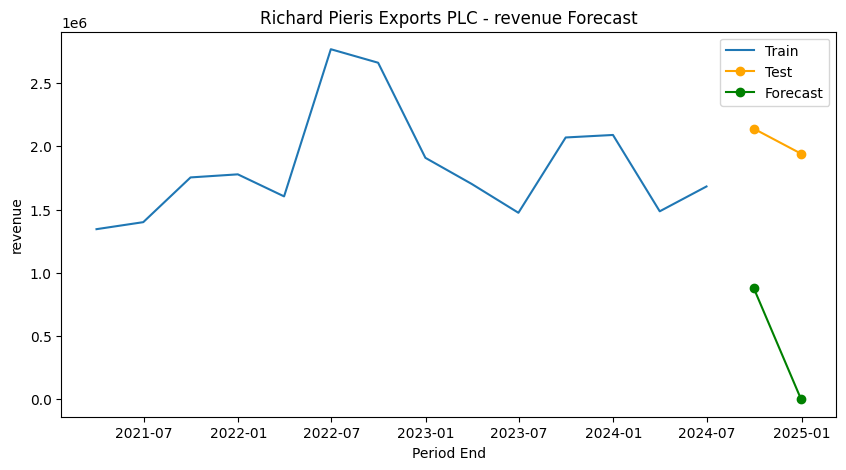

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# =============================================================================
# Helper function to build, forecast, and plot a SARIMA model for a given series.
# =============================================================================
def train_forecast_series(series, metric_name, company_name, train_periods=14, seasonal_period=4):
    """
    Parameters:
        series: Pandas Series indexed by period_end.
        metric_name: String (e.g., 'net_income' or 'revenue').
        company_name: String (e.g., 'DIPPED PRODUCTS PLC').
        train_periods: Number of quarters for training (default=14).
        seasonal_period: Seasonal period (default=4 for quarterly data).
    Returns:
        model_fit: Fitted SARIMAX model.
        forecast: Forecast for test periods.
        metrics: Dictionary with MAE and RMSE.
    """
    # Ensure the series is sorted by time.
    series = series.sort_index()
    
    # Split the data: first train_periods for training, next 2 for testing.
    train = series.iloc[:train_periods]
    test = series.iloc[train_periods:train_periods+2]
    
    print(f"\n--- {company_name} - {metric_name} ---")
    print("Train period:", train.index.min(), "to", train.index.max())
    print("Test period:", test.index.min(), "to", test.index.max())
    
    # Use auto_arima to identify orders. Because the training series is short,
    # we wrap the auto_arima call in a try/except to catch singular matrix errors.
    try:
        stepwise_fit = auto_arima(train,
                                  seasonal=True,
                                  m=seasonal_period,             # Quarterly seasonality
                                  trace=True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)
    except ValueError as e:
        print("auto_arima failed with error:", e)
        print("Retrying with forced seasonal differencing D=0")
        stepwise_fit = auto_arima(train,
                                  seasonal=True,
                                  m=seasonal_period,
                                  D=0,                           # Force no seasonal differencing
                                  trace=True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)
    print(stepwise_fit.summary())
    
    order = stepwise_fit.order         # (p, d, q)
    seasonal_order = stepwise_fit.seasonal_order  # (P, D, Q, m)
    
    # Build and fit SARIMAX model.
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    print(model_fit.summary())
    
    # Forecast for the test set.
    n_test = len(test)
    forecast = model_fit.forecast(steps=n_test)
    
    # Evaluate forecasts.
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    metrics = {"MAE": mae, "RMSE": rmse}
    print(f"Evaluation for {company_name} - {metric_name}: MAE={mae:.2f}, RMSE={rmse:.2f}")
    
    # Plot training, test, and forecast.
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test', marker='o', color='orange')
    plt.plot(test.index, forecast, label='Forecast', marker='o', color='green')
    plt.title(f"{company_name} - {metric_name} Forecast")
    plt.xlabel("Period End")
    plt.ylabel(metric_name)
    plt.legend()
    plt.show()
    
    return model_fit, forecast, metrics

# =============================================================================
# Load processed data.
# =============================================================================
# Adjust the path if necessary.
# data_path = os.path.join("data", "processed", "processed_dataset.csv")
df = pd.read_csv("../outputs/processed_dataset.csv", parse_dates=["period_end"])

# =============================================================================
# Define company names and metrics.
# =============================================================================
companies = {
    "DIPPED PRODUCTS PLC": {"net_income": None, "revenue": None},
    "Richard Pieris Exports PLC": {"net_income": None, "revenue": None}
}

# Dictionary to store results
results = {}

# =============================================================================
# Process each company and metric.
# =============================================================================
for comp in companies.keys():
    df_comp = df[df["company_name"] == comp].copy()
    df_comp.sort_values("period_end", inplace=True)
    # Set period_end as index.
    ts_net_income = df_comp.set_index("period_end")["net_income"]
    ts_revenue = df_comp.set_index("period_end")["revenue"]
    
    results[(comp, "net_income")] = train_forecast_series(ts_net_income, "net_income", comp)
    results[(comp, "revenue")] = train_forecast_series(ts_revenue, "revenue", comp)

# =============================================================================
# At this point, 'results' holds the fitted model, forecast, and evaluation metrics
# for each of the four scenarios.
# =============================================================================
